In [1]:
import pandas as pd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv('HumanProgressDataset552.csv')

In [3]:
df.head(2)
df[df.Country=='Italy']

,Country,Year,Democracy_index
0,Afghanistan,1800,-6
1,Afghanistan,1801,-6


,Country,Year,Democracy_index
7334,Italy,1861,-4
7335,Italy,1862,-4
7336,Italy,1863,-4
7337,Italy,1864,-4
7338,Italy,1865,-4
...,...,...,...
7476,Italy,2014,10
7477,Italy,2015,10
7478,Italy,2016,10
7479,Italy,2017,10


In [4]:
# add a decade column
df['Decade'] = (df['Year']/10).astype('int')*10

In [5]:
# for each decade and country, average the index values - create a new df
df_decade = df.groupby(['Decade', 'Country']).agg({'Democracy_index': 'mean'}).reset_index()

In [7]:
df_decade[df_decade.Country=='Italy']

,Decade,Country,Democracy_index
276,1860,Italy,-4.0
338,1870,Italy,-4.0
395,1880,Italy,-4.0
449,1890,Italy,-4.0
506,1900,Italy,-1.0
567,1910,Italy,-1.0
635,1920,Italy,-5.0
705,1930,Italy,-9.0
779,1940,Italy,-1.4
863,1950,Italy,10.0


In [14]:
# cut everything before 1900 - too few data (countries)

df_decade = df_decade[df_decade.Decade>=1900]

In [15]:
# set of countries present each decade 

decade_countries = {}
for index, row in df_decade.iterrows():
    if row['Decade'] in decade_countries:
        decade_countries[row['Decade']].append(row['Country'])
    else:
        decade_countries[row['Decade']] = [row['Country']]
        

In [22]:
len(decade_countries[1900]), len(decade_countries[2010])

# look at which countries do not appear in each decade
countries_each_decade = set(decade_countries[1900])
for decade in decade_countries:
    countries_each_decade = countries_each_decade & set(decade_countries[decade])
    
len(countries_each_decade), countries_each_decade

(58, 166)

(51,
 {'Afghanistan',
  'Argentina',
  'Australia',
  'Austria',
  'Belgium',
  'Bhutan',
  'Bolivia',
  'Brazil',
  'Bulgaria',
  'Canada',
  'Chile',
  'China',
  'Colombia',
  'Costa Rica',
  'Cuba',
  'Denmark',
  'Dominican Republic',
  'Ecuador',
  'El Salvador',
  'Ethiopia',
  'France',
  'Greece',
  'Guatemala',
  'Haiti',
  'Honduras',
  'Hungary',
  'Italy',
  'Japan',
  'Liberia',
  'Luxembourg',
  'Mexico',
  'Nepal',
  'Netherlands',
  'New Zealand',
  'Nicaragua',
  'Norway',
  'Oman',
  'Panama',
  'Paraguay',
  'Peru',
  'Portugal',
  'Romania',
  'Spain',
  'Sweden',
  'Switzerland',
  'Thailand',
  'Turkey',
  'United Kingdom',
  'United States',
  'Uruguay',
  'Venezuela'})

In [24]:
# cut to only consider those countries appearing in each decade

df_decade = df_decade[df_decade.Country.isin(list(countries_each_decade))]

In [33]:
# number of countries with democratic index greater than threshold decade by decade

df_agg = df_decade.groupby('Decade').agg(
    {'Democracy_index': ['count',
                         lambda row: (row<-5).sum(),
                         lambda row: row[(row>=-5) & (row<0)].count(),
                         lambda row: row[(row>=0) & (row<5)].count(),
                         lambda row: row[(row>5)].count(),
                         lambda row: row[(row<0)].count(),
                         lambda row: row[(row>=0)].count()
                        ]}).reset_index()
    
df_agg.columns = ['Decade', 'Countries','Countries_<-5',  'Countries_-5_0', 
                  'Countries_0_5', 'Countries_>=5', 'Countries_<0', 'Countries_>=0']

In [34]:
df_agg

,Decade,Countries,Countries_<-5,Countries_-5_0,Countries_0_5,Countries_>=5,Countries_<0,Countries_>=0
0,1900,51,10.0,20.0,8.0,13.0,30.0,21.0
1,1910,51,9.0,16.0,9.0,16.0,25.0,26.0
2,1920,51,9.0,15.0,10.0,16.0,24.0,27.0
3,1930,51,14.0,13.0,8.0,15.0,27.0,24.0
4,1940,51,15.0,13.0,8.0,15.0,28.0,23.0
5,1950,51,19.0,7.0,5.0,20.0,26.0,25.0
6,1960,51,18.0,7.0,4.0,22.0,25.0,26.0
7,1970,51,20.0,9.0,2.0,20.0,29.0,22.0
8,1980,51,12.0,6.0,5.0,28.0,18.0,33.0
9,1990,51,5.0,1.0,4.0,40.0,6.0,45.0


In [79]:
import math

c_max = 46
c = 21 # change here
R = 6.7

math.sqrt(c/c_max) * R

4.52694829543758

In [35]:
# check
#df[(df.Year==1800) & (df.Democracy_index<0)]

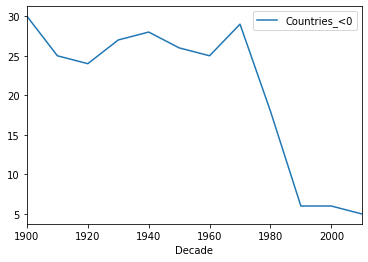

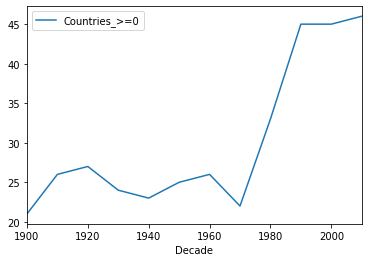

In [36]:
df_agg.plot('Decade', "Countries_<0")

df_agg.plot('Decade', "Countries_>=0")



In [47]:
set(year_countries[2018]) - set(year_countries[2016])

{'Haiti'}

In [49]:
year_countries[1980]

['Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Australia',
 'Austria',
 'Bahrain',
 'Bangladesh',
 'Belgium',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burma (Myanmar)',
 'Burundi',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Central African Republic',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 'Cuba',
 'Cyprus',
 'Czechoslovakia',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'East Germany',
 'Ecuador',
 'Egypt',
 'Equatorial Guinea',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea Bissau',
 'Guyana',
 'Haiti',
 'Hungary',
 'India',
 'Indonesia',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast',
 'Jamaica',
 'Japan',
 'Jordan',
 'Kenya',
 'Kuwait',
 'Laos',
 'Lesotho',
 'Liberia',
 'Libya',
 'Luxembourg',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Mexico',
 